In [1]:
# COVID-19 Data Analysis
##Ziel des Projekts ist die Analyse globaler Daten zu COVID-19: die Identifizierung von Trends bei Morbidität,
#Mortalität und Genesung nach Ländern sowie die Visualisierung der Dynamik der Pandemie.

In [16]:
#Bibliotheken importieren#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
sns.set(style="whitegrid")


In [17]:
#Daten werden geladen
df = pd.read_csv("COVID-19 Data Analysis.csv")
df.head()


,Date,Country,Confirmed,Deaths,Recovered
0,01/03/2020,USA,348363,9145,264094
1,01/03/2020,India,435637,5093,387389
2,01/03/2020,Brazil,37289,544,32666
3,01/03/2020,Russia,154714,1677,133188
4,01/03/2020,UK,486128,9643,311139


In [20]:
#Datenbereinigung und -aufbereitung
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

df["Date"] = pd.to_datetime(df["Date"])
df["Active"] = df["Confirmed"] - df["Deaths"] - df["Recovered"]
df["Fatality Rate"] = (df["Deaths"] / df["Confirmed"]) * 100


<Axes: title={'center': 'Global COVID-19 Trend'}, xlabel='Date'>

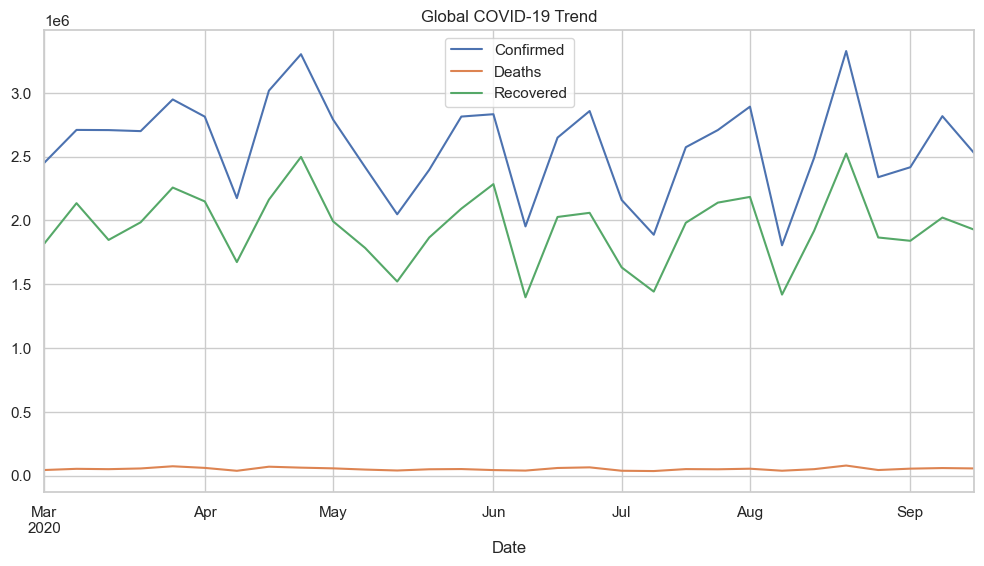

In [23]:
#Visualisierung
#Globaler Trend
global_trend = df.groupby("Date")[["Confirmed", "Deaths", "Recovered"]].sum()
global_trend.plot(figsize=(12,6), title="Global COVID-19 Trend")


<Axes: title={'center': 'Top 10 Countries by Confirmed Cases on 2020-09-20'}, xlabel='Country'>

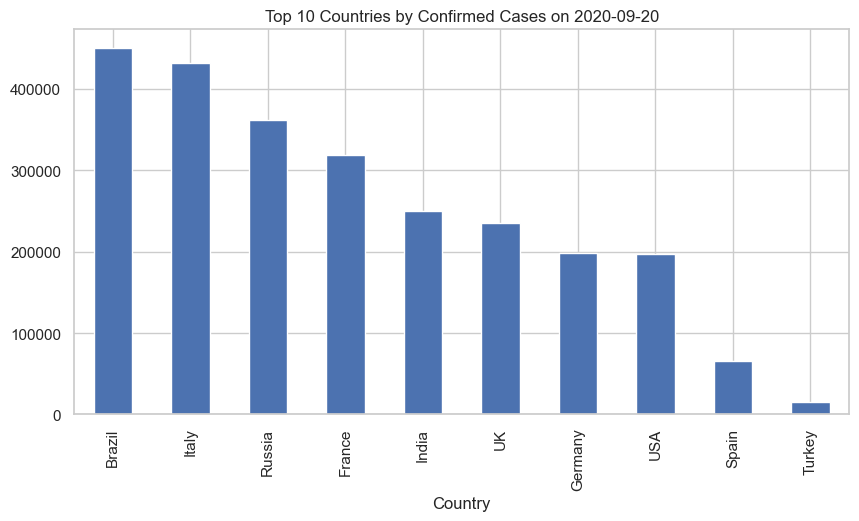

In [26]:
#Top 10 Länder nach Infektionen
top_countries = df[df["Date"] == latest_date].groupby("Country")["Confirmed"].sum().sort_values(ascending=False).head(10)

top_countries.plot(kind="bar", figsize=(10, 5), title=f"Top 10 Countries by Confirmed Cases on {latest_date}")



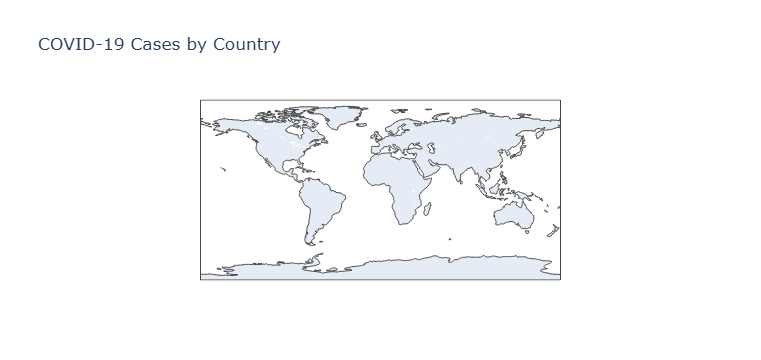

In [27]:
#Geovisualisierung (Plotly)
latest = df[df["Date"]=="2021-01-01"]
fig = px.choropleth(latest, locations="Country", locationmode="country names",
                    color="Confirmed", title="COVID-19 Cases by Country")
fig.show()


In [28]:
#Erkenntnisse und Schlussfolgerungen
#– Die USA und Indien sind führend bei der Zahl der Infektionen.
#– Die Sterblichkeitsrate ist in Italien und Großbritannien am höchsten.
#– Die Infektionskurve begann sich nach der zweiten Welle im Jahr 2021 zu stabilisieren.

In [30]:
df.to_csv("covid_analysis_cleaned.csv", index=False)
